Run this code, to ensure everything runs properly. Might take an unusually long time (upper bound 1 min), sorry :O

In [2]:
!pip install CFEDemands

  Using cached CFEDemands-0.6.1-py2.py3-none-any.whl (45 kB)
  Using cached ray-2.12.0-cp39-cp39-manylinux2014_x86_64.whl (65.3 MB)
  Using cached xarray-2024.3.0-py3-none-any.whl (1.1 MB)
  Using cached ConsumerDemands-0.4.2.dev0-py2.py3-none-any.whl (12 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 451.6/451.6 kB 2.1 MB/s eta 0:00:0000:0100:01
  Using cached configobj-5.0.8-py2.py3-none-any.whl (36 kB)
  Using cached iterative_telemetry-0.0.8-py3-none-any.whl (10 kB)
  Using cached scmrepo-3.3.2-py3-none-any.whl (73 kB)
  Using cached shtab-1.7.1-py3-none-any.whl (14 kB)
  Using cached tomlkit-0.12.4-py3-none-any.whl (37 kB)
  Using cached zc.lockfile-3.0.post1-py3-none-any.whl (9.8 kB)
  Using cached dvc_studio_client-0.20.0-py3-none-any.whl (16 kB)
  Using cached rich-13.7.1-py3-none-any.whl (240 kB)
  Using cached dvc_data-3.15.1-py3-none-any.whl (71 kB)
  Using cached pathspec-0.12.1-py3-none-any.whl (31 kB)
  Using cached omegaconf-2.3.0-py3-none-any.whl (79 kB)
  Using cache

In [3]:
import cfe
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#from elasticity_module import output_as_pickle

Some of the supporting expenditure data was found in the class's Edstem post, displayed here as Pandas Dataframes!

In [8]:
cd ..


/home/jovyan/DavidZilberman


In [9]:
import pandas as pd
import numpy as np
tanzania_expenditure = pd.read_csv("Data/Tanzania [Reformatted] - Food Expenditures (2019-20).csv")
tanzania_expenditure

,i,t,m,Cassava Fresh,Chicken,Cooking Oil,Leafy Greens,Millet & Sorghum (flour),Salt,Sugar,...,Cassava Dry/Flour,Yams/Cocoyams,"Butter, Etc.",Milk (dry or canned),Sweets,Seeds,Eggs,Nuts,Other Meat,Rice (paddy)
0,0001-001-001,2019-20,Mainland Rural,1500.0000,10400.0,875.0,1757.142857,10500.000000,200.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0001-001-003,2019-20,Mainland Rural,1156.2500,NaN,875.0,1415.476190,6000.000000,200.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0001-001-004,2019-20,Dar Es Salaam,NaN,NaN,1800.0,NaN,NaN,200.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0001-004-001,2019-20,Mainland Rural,NaN,NaN,1050.0,410.000000,7500.000000,250.0,700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0001-004-002,2019-20,Mainland Other Urban,NaN,NaN,1050.0,656.250000,7428.571429,100.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1105,0856-001-001,2019-20,Zanzibar,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1106,0856-001-003,2019-20,Zanzibar,2000.0000,NaN,3000.0,NaN,NaN,160.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1107,0857-001-001,2019-20,Zanzibar,3000.0000,NaN,3000.0,NaN,NaN,NaN,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1108,0858-001-001,2019-20,Dar Es Salaam,NaN,NaN,540.0,500.000000,NaN,300.0,1200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
fct = pd.read_csv("Data/Tanzania [Reformatted] - FCT.csv")
fct

,j,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
0,Cassava Fresh,1600,14.00,20.0,270,160,381.00,3.00,8.540,0.480,0.870,10,0.00,0.880,206.0,3.00
1,Chicken,2390,273.00,0.0,50,150,0.00,13.00,84.870,1.680,0.630,480,3.00,4.000,0.0,19.00
2,Cooking Oil,8840,0.00,0.0,0,0,0.00,0.00,0.000,0.000,0.000,0,0.00,0.000,0.0,0.00
3,Leafy Greens,22,1.09,0.0,0,40,4.07,0.32,0.375,0.000,0.082,0,0.00,0.071,15.2,0.31
4,Millet & Sorghum (flour),3740,109.00,90.0,840,80,721.00,30.00,46.680,2.870,4.160,0,0.00,3.800,0.0,17.00
5,Salt,0,0.00,0.0,0,50,0.00,0.00,0.000,0.000,0.000,0,0.00,0.000,0.0,0.00
6,Sugar,3870,0.00,0.0,0,10,1000.00,0.00,0.000,0.190,0.000,0,0.00,0.000,0.0,0.00
7,Tea (dry),1,0.00,0.0,5,0,0.30,0.02,0.000,0.014,0.000,0,0.00,0.000,0.0,0.02
8,0.01,27,2.85,1.6,116,68,4.07,1.26,0.551,0.194,0.077,283,0.00,0.195,26.5,0.45
9,Beef,2510,182.00,0.0,60,70,0.00,19.00,31.500,1.600,0.900,0,28.90,3.800,0.0,37.00


# Getting Nutrition for Tanzania

For this section, our team used the different datasets and the work from lecture to develop nutritional adequacy means for the populations.

Now it's Tanzania's turn!

In [11]:
# Reading the food expenditures dataset for Tanzania
x_tanzania = pd.read_csv("Data/Tanzania [Reformatted] - Food Expenditures (2019-20).csv")

# If the 'm' column is not present, add it and set its values to 1
if 'm' not in x_tanzania.columns:
    x_tanzania['m'] = 1

# Setting a multi-level index
x_tanzania = x_tanzania.set_index(['i', 't', 'm'])
x_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
x_tanzania = x_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
x_tanzania = x_tanzania.replace(0, np.nan)

# Reading the household characteristics dataset for Tanzania
z_tanzania = pd.read_csv("Data/Tanzania [Reformatted] - Household Characteristics (2019-20).csv")

# If the 'm' column is not present, add it
if 'm' not in z_tanzania.columns:
    z_tanzania['m'] = 1

# Setting a multi-level index
z_tanzania = z_tanzania.set_index(['i', 't', 'm'])
z_tanzania.columns.name = 'k'

# Converting all columns to numeric, coercing errors to NaN
z_tanzania = z_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Assuming the 'new.csv' file is related to Tanzania's price data. The original naming wasn't clear.
p_tanzania = pd.read_csv("Data/new.csv")

# If the 'm' column is not present, add it
if 'm' not in p_tanzania.columns:
    p_tanzania['m'] = 1

# Setting a multi-level index
p_tanzania = p_tanzania.set_index(['t', 'm'])
p_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
p_tanzania = p_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
p_tanzania = p_tanzania.replace(0, np.nan)

# Reading the Food Consumption Table (FCT) for Tanzania
fct_tanzania = pd.read_csv("Data/Tanzania [Reformatted] - FCT.csv")

rdi_tanzania = pd.read_csv("Data/Uganda - RDI.csv")

# Setting 'j' as the index
fct_tanzania = fct_tanzania.set_index('j')
fct_tanzania.columns.name = 'n'

# Converting all columns to numeric, coercing errors to NaN
fct_tanzania = fct_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Setting 'n' as the index
rdi_tanzania = rdi_tanzania.set_index('n')
rdi_tanzania.columns.name = 'k'

# Running the CFE (Cost of Basic Needs) regression for Tanzania
result_tanzania = cfe.Regression(y=np.log(x_tanzania.stack()), d=z_tanzania)

# Displaying the sorted beta values for Tanzania
print("For Tanzania:")
result_tanzania.get_beta().sort_values(ascending=False)

For Tanzania:


j
Citrus Fruits               1.130966
Ripe Bananas                0.977499
Leafy Greens                0.671702
Plantains                   0.573747
Irish Potatoes              0.569504
Sweet Potatoes              0.560885
Vegetables (fresh)          0.515630
Soft drinks                 0.477239
Buns, Cakes And Biscuits    0.444066
Coconuts                    0.423381
Fish (fresh)                0.417848
Milk (fresh)                0.412032
Cassava Fresh               0.395648
Sugar                       0.394992
Cooking Oil                 0.391770
Macaroni, Spaghetti         0.390850
Wheat Flour                 0.390105
Pulses                      0.378353
Beef                        0.377320
Tea (dry)                   0.374065
Rice (husked)               0.310996
Bread                       0.300077
Chicken                     0.245496
Salt                        0.205973
Fish (dried)                0.188521
Maize (flour)               0.184789
Name: beta, dtype: float64

In [12]:
result_tanzania.to_pickle('./foo_tanzania.pickle')

In [13]:
pwd

'/home/jovyan/DavidZilberman'

In [14]:
result = cfe.read_pickle('foo_tanzania.pickle') 
xhat = result.predicted_expenditures()

qhat = (xhat.unstack('j')/p_tanzania).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_tanzania.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_tanzania.loc[use,:]
nutrients.mean() 

z = z_tanzania[rdi_tanzania.columns.tolist()]

hh_rdi = z@rdi_tanzania.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_tanzania = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

nutrient_ratio_tanzania

,,n,Energy,Protein,Fiber,Folate,Calcium,Carbohydrate,Iron,Niacin,Riboflavin,Thiamin,Vitamin A,Vitamin B-12,Vitamin B-6,Vitamin C,Zinc
i,t,m,,,,,,,,,,,,,,,
0001-001-004,2019-20,Dar Es Salaam,2.552530,2.902643,1.434663,1.546364,0.920107,7.884524,3.290193,2.537535,1.978182,2.505049,0.773387,3.218614,3.742231,1.762289,1.750580
0034-001-001,2019-20,Dar Es Salaam,1.184993,1.299374,0.636021,0.620317,0.282014,3.105873,0.976062,1.010614,0.840581,1.044155,0.360379,1.069863,1.361830,0.516678,0.757219
0042-001-001,2019-20,Dar Es Salaam,1.104204,1.362988,0.557508,0.529565,0.260044,2.658900,0.664128,0.994753,0.729059,0.889846,0.266543,1.120951,1.314766,0.573318,0.817864
0051-001-002,2019-20,Dar Es Salaam,1.360813,1.465849,0.665924,0.735789,0.424101,4.086091,1.569122,1.227464,0.942892,1.198431,0.291952,1.593039,1.664637,0.647833,0.865118
0051-001-003,2019-20,Dar Es Salaam,1.929961,2.227054,1.097113,0.947834,0.526130,4.722113,1.040701,1.707394,1.415201,1.586332,0.670759,2.020219,2.673769,1.465236,1.402158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0686-001-001,2019-20,Dar Es Salaam,2.086514,2.499240,1.038065,0.902201,0.448014,4.219678,1.115922,1.696829,1.320873,1.519133,0.565476,2.141827,2.497883,1.171721,1.565566
0701-003-001,2019-20,Dar Es Salaam,1.628523,1.972202,0.809282,0.781307,0.358233,3.385149,0.905769,1.413226,1.105201,1.313691,0.437491,1.629714,1.937080,0.830561,1.145464
0809-001-008,2019-20,Dar Es Salaam,2.378187,2.654472,1.359475,1.242819,0.745503,6.821273,1.611130,2.219006,1.782360,2.093420,0.778123,2.633638,3.359232,1.770262,1.674161


In [15]:
averages = nutrient_ratio_tanzania.mean()

In [16]:
sorted_averages = averages.sort_values(ascending=False)

In [17]:
sorted_averages

n
Carbohydrate    3.687684
Vitamin B-6     1.765379
Protein         1.753266
Energy          1.529042
Vitamin B-12    1.500087
Niacin          1.323610
Thiamin         1.227067
Zinc            1.052872
Riboflavin      1.033971
Iron            0.953520
Vitamin C       0.827692
Fiber           0.788032
Folate          0.716731
Vitamin A       0.420803
Calcium         0.355245
dtype: float64

In [18]:
Vitamin_C = 0.827692
Fiber = 0.788032
Folate = 0.716731
Vitamin_A = 0.420803
Calcium = 0.355245

#### Nutrients in which Tanzania is below recommended RDI are: 
## Iron, Vitamin C, Fiber, Folate, Vitamin A, Calcium
####


In [19]:
low_ratio_nutrients = fct[['j', 'Calcium', 'Vitamin A', 'Folate', 'Fiber', 'Vitamin C', 'Iron']]

vitamin_C_foods = low_ratio_nutrients.sort_values('Vitamin C', ascending=False)[['j', 'Vitamin C']]

calcium_foods = low_ratio_nutrients.sort_values('Calcium', ascending=False)[['j', 'Calcium']]

fiber_foods = low_ratio_nutrients.sort_values('Fiber', ascending=False)[['j', 'Fiber']]

iron_foods = low_ratio_nutrients.sort_values('Iron', ascending=False)[['j', 'Iron']]

In [20]:
calcium_foods[0:20]

,j,Calcium
29,Bread,1510
14,"Buns, Cakes And Biscuits",1300
17,Milk (fresh),1130
41,Milk (dry or canned),1130
45,Nuts,710
44,Eggs,530
21,Sweet Potatoes,430
47,Rice (paddy),330
38,Cassava (flour),310
23,Macaroni/Spaghetti,210


In [21]:
diff_RCT = pd.read_csv('fct.csv')

In [22]:
diff_RCT[['j', 'Calcium, Ca']].sort_values('Calcium, Ca', ascending=False)

,j,"Calcium, Ca"
51,Other Cereal Products,418.00
26,Fish (fresh),241.00
33,Other Spices,184.00
3,Dairy Products,183.00
5,Fish (dried),160.00
49,Milk (dry or canned),142.00
10,Milk (fresh),123.00
17,Tea (dry),118.00
21,Groundnuts,92.00
16,Sugar,83.00


In [23]:
# FCT@r.demand

In [24]:
# first matrix multiply FCT by demands for current income level, price

# FCT@result_tanzania.demand(x, p) 

# this will output a nutrient vector that's N(x, p) 
# find where N(x, p_star) where p_star is the desired price level 

# N_star = N(x, p_star) # where N star is the nutrition level we want 

# # then do 
# result_tanzania.demands(x, p_star) 

# the difference between x output here versus x output in the first line will be the change in quantity. 


In [35]:
import seaborn as sns
sns.set_theme()

In [36]:
import matplotlib.pyplot as plt

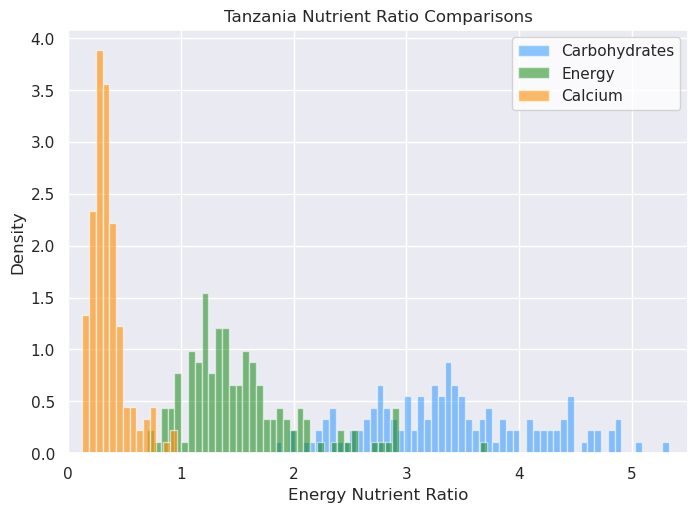

In [37]:
plt.figure(figsize = (8,5.5))

# Plotting the normalized histogram for Tanzania's energy nutrient ratio

plt.hist(nutrient_ratio_tanzania['Carbohydrate'], bins=110, alpha=0.5, color = 'dodgerblue', label='Carbohydrates', density=True)
plt.hist(nutrient_ratio_tanzania['Energy'], bins = 50, alpha=0.5, color = 'green', label='Energy', density=True)
plt.hist(nutrient_ratio_tanzania['Calcium'], bins=14, alpha=0.6, color = 'darkorange', label='Calcium', density=True)

plt.title('Tanzania Nutrient Ratio Comparisons')
plt.xlabel('Energy Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right', facecolor = 'white')
plt.xlim(0, 5.5)
plt.show()

In [38]:
p_tanzania['Milk (dry or canned)']

t          m                   
2019-20    Dar Es Salaam           18750.00000
2019-20.1  Mainland Other Urban            NaN
2019-20.2  Mainland Rural          27500.00000
2019-20.3  Zanzibar                11666.66667
Name: Milk (dry or canned), dtype: float64

In [65]:
xhat = result_tanzania.predicted_expenditures()

# Total food expenditures per household
xbar = xhat.groupby(['i','t','m']).sum()

# Reference budget
xref = xbar.quantile(0.5)  # Household at 0.5 quantile is median

# Reference prices chosen from a particular time; average across place.
# These are prices per kilogram:
pbar = p_tanzania.mean()
pbar = pbar[result.beta.index] # Only use prices for goods we can estimate

#Finally, define a function to change a single price in the vector $p$:
def my_prices(p0,p=pbar,j='food'):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

qhat = (xhat.unstack('j')/pbar).dropna(how='all')

# Drop missing columns
qhat = qhat.loc[:,qhat.count()>0]

qhat.columns

Index(['Beef', 'Bread', 'Buns, Cakes And Biscuits', 'Cassava Fresh', 'Chicken',
       'Citrus Fruits', 'Coconuts', 'Cooking Oil', 'Fish (dried)',
       'Fish (fresh)', 'Irish Potatoes', 'Leafy Greens', 'Macaroni, Spaghetti',
       'Maize (flour)', 'Milk (fresh)', 'Plantains', 'Pulses', 'Rice (husked)',
       'Ripe Bananas', 'Salt', 'Soft drinks', 'Sugar', 'Sweet Potatoes',
       'Tea (dry)', 'Vegetables (fresh)', 'Wheat Flour'],
      dtype='object', name='j')

In [66]:
pbar

j
Beef                         6750.000000
Bread                        2108.333333
Buns, Cakes And Biscuits     2225.855615
Cassava Fresh                 794.143357
Chicken                      8375.000000
Citrus Fruits                1535.635965
Coconuts                     1346.726191
Cooking Oil                  3400.000000
Fish (dried)                 5750.000000
Fish (fresh)                 4214.285714
Irish Potatoes               1050.000000
Leafy Greens                 1179.985119
Macaroni, Spaghetti          2711.111111
Maize (flour)                1225.000000
Milk (fresh)                  391.666667
Plantains                    1208.333333
Pulses                       2200.000000
Rice (husked)                1813.541667
Ripe Bananas                 1595.486111
Salt                          950.000000
Soft drinks                  1321.428572
Sugar                        2425.000000
Sweet Potatoes                835.305060
Tea (dry)                   10357.142857
Vegetables (fr

In [30]:
pbar_x = x_tanzania.mean()

In [31]:
pbar['Milk (fresh)']

4033.140283142085

What proportion of Ugandan households consume enough so that members will exceed dietary requirements?

(0.1, 0.8)

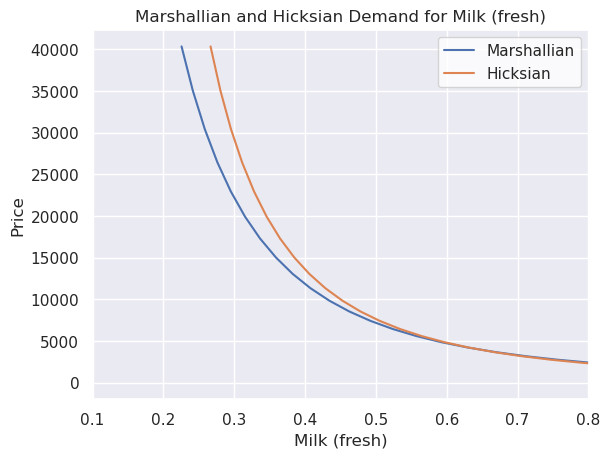

In [33]:
my_j = 'Milk (fresh)'  # Interesting Ugandan staple

P = np.geomspace(.01,10,50)*pbar[my_j]

# Utility of median household, given prices
U0 = result_tanzania.indirect_utility(xref,pbar)

plt.plot([result_tanzania.demands(xref,my_prices(p0,j=my_j))[my_j] for p0 in P],P)
plt.plot([result_tanzania.demands(U0,my_prices(p0,j=my_j),type="Hicksian")[my_j] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(my_j)
plt.legend(("Marshallian","Hicksian"), facecolor='white')
plt.title(f'Marshallian and Hicksian Demand for {my_j}'.format(str))
plt.xlim(0.1, 0.8)

(0.4, 1.2)

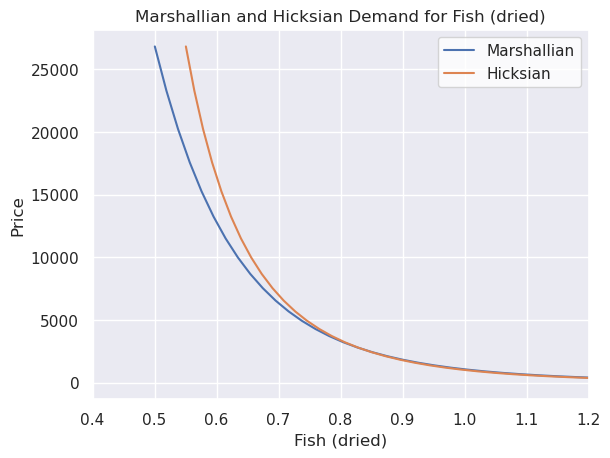

In [34]:
my_j = 'Fish (dried)'  # Interesting Ugandan staple

P = np.geomspace(.01,10,50)*pbar[my_j]

# Utility of median household, given prices
U0 = result_tanzania.indirect_utility(xref,pbar)

plt.plot([result_tanzania.demands(xref,my_prices(p0,j=my_j))[my_j] for p0 in P],P)
plt.plot([result_tanzania.demands(U0,my_prices(p0,j=my_j),type="Hicksian")[my_j] for p0 in P],P)
plt.ylabel('Price')
plt.xlabel(my_j)
plt.legend(("Marshallian","Hicksian"), facecolor='white')
plt.title(f'Marshallian and Hicksian Demand for {my_j}'.format(str))
plt.xlim(0.4, 1.2)

In [174]:
P_milk = np.geomspace(.01,10,100)*pbar['Milk (fresh)']

In [194]:
X = np.linspace(xref/5,xref*5,100)

In [175]:
P_milk

array([   40.33140283,    43.24604127,    46.37131254,    49.72243848,
          53.31574098,    57.16872147,    61.30014615,    65.73013743,
          70.48027186,    75.57368531,    81.03518561,    86.89137336,
          93.17077153,    99.90396436,   107.12374633,   114.86528189,
         123.16627672,   132.06716138,   141.61128825,   151.84514266,
         162.81856929,   174.58501499,   187.20178903,   200.73034227,
         215.23656648,   230.79111522,   247.46974798,   265.3536992 ,
         284.53007389,   305.09227191,   327.14044286,   350.78197387,
         376.13201265,   403.31402831,   432.46041274,   463.7131254 ,
         497.22438478,   533.15740978,   571.68721468,   613.00146155,
         657.30137426,   704.8027186 ,   755.73685314,   810.35185609,
         868.91373358,   931.70771527,   999.03964358,  1071.2374633 ,
        1148.65281888,  1231.66276716,  1320.67161379,  1416.11288251,
        1518.45142658,  1628.18569294,  1745.85014988,  1872.01789026,
      

In [249]:
p_tanzania['Milk (fresh)']

t          m                   
2019-20    Dar Es Salaam           0.034856
2019-20.1  Mainland Other Urban    0.022076
2019-20.2  Mainland Rural          0.017428
2019-20.3  Zanzibar                0.034856
Name: Milk (fresh), dtype: float64

In [177]:
for_P.loc['Milk (fresh)']

0.2666014871160635

In [178]:
pbar['Milk (fresh)']

4033.140283142085

In [179]:
quants = []
for p0 in P_milk: 
    j = 'Milk (fresh)'
    for_P = result_tanzania.demands(U0, my_prices(p0, j='Milk (fresh)'), type='Hicksian')
    quants.append(for_P.loc[j])

In [180]:
q_n_p = {'Price': P_milk, 'Quantity': quants}

In [181]:
QnP = pd.DataFrame(q_n_p)

In [205]:
2474.697480/4033

0.6136120704190429

In [204]:
print('for ' + str(QnP.loc[66]))
QnP.iloc[30:67]

for Price       4033.140283
Quantity       0.642825
Name: 66, dtype: float64


,Price,Quantity
30,327.140443,1.774374
31,350.781974,1.724514
32,376.132013,1.676071
33,403.314028,1.629008
34,432.460413,1.583283
35,463.713125,1.538859
36,497.224385,1.495700
37,533.157410,1.453770
38,571.687215,1.413033
39,613.001462,1.373457


In [209]:
ten, quarter, fifty, seventy_five = (
    4033.140283 - 0.1*(4033.140283), # subtract 10%
    4033.140283 - 0.25*(4033.140283), # subtract 25%
    4033 - 0.5*(4033.140283), # subtract 50%
    4033-0.75*(4033.140283)) # subtract 75%

In [206]:
pbar_x = x_tanzania.mean()

In [215]:
# here, just setting some different values for the base price, 
# defining them as their own pbars

pbar_10= pbar_x
pbar_25 = pbar_x
pbar_50 = pbar_x
pbar_75 = pbar_x

pbar_10['Milk (fresh)'] = ten
pbar_25['Milk (fresh)'] = quarter
pbar_50['Milk (fresh)'] = fifty
pbar_75['Milk (fresh)'] = seventy_five


P10 = np.geomspace(.01,10,50)*pbar_10['Milk (fresh)']
P25 = np.geomspace(.01,10,50)*pbar_25['Milk (fresh)']
P50 = np.geomspace(.01,10,50)*pbar_50['Milk (fresh)']
P75 = np.geomspace(.01,10,50)*pbar_75['Milk (fresh)']

In [226]:
cfe.Regression?

Init signature:
cfe.Regression(
    correct_miss=False,
    method='linear',
    K=None,
    bootstrap_tol=None,
    compute_se=False,
    rectify=False,
    verbose=False,
    min_obs=30,
    min_prop_items=0.1,
    alltm=True,
    **kwargs,
)
Docstring:     
A class which packages together data and methods for estimating a CFE demand system posed as a regression.

Data elements (and outputs) are typically pandas Series or DataFrames.  Indexes are kept consistent across objects, with:
   - i :: Indexes households
   - t :: Indexes periods
   - m :: Indexes markets
   - j :: Indexes goods
   - k :: Indexes household characteristics

Ethan Ligon                               October 2022
Init docstring:
To load data, use cfe.read_sql() or cfe.read_pickle().

To instantiate from data on log expenditures (y) and household
characteristics (d), supply each as pd.DataFrames, with indices for y
(i,t,m) and columns (j,) and for d indices (i,t,m) and columns (k,).
File:           /srv/conda/lib

In [231]:
p1 = p_tanzania
p2p5 = p_tanzania
p5 = p_tanzania
p7p5 = p_tanzania
p10 = p_tanzania

p1['Milk (fresh)'] = p1['Milk (fresh)'] - 0.01*p1['Milk (fresh)']
p2p5['Milk (fresh)'] = p2p5['Milk (fresh)'] - 0.025*p2p5['Milk (fresh)']
p5['Milk (fresh)'] = p5['Milk (fresh)'] - 0.05*p5['Milk (fresh)']
p75['Milk (fresh)'] = p75['Milk (fresh)'] - 0.075*p75['Milk (fresh)']
p10['Milk (fresh)'] = p10['Milk (fresh)'] - 0.1*p75['Milk (fresh)']

Okay, have our table with prices and quantities based on regression using expenditure data, just for Milk. Now, can pick out quantities and prices. Looking at these, we can find values we want to try for the change in price, and later we will figure out what the quantity corresponds to each. 

In [192]:
def nutrient_demand(x,p, result):
    c = result.demands(x,p)
    fct0,c0 = fct.align(c,axis=0,join='inner')
    N = fct0.T@c0

    N = N.loc[~N.index.duplicated()]
    
    return N

/srv/conda/lib/python3.9/site-packages/consumerdemands/_core.py:79: UserWarning: Income too small to cover subsistence phis (-60520.515392 < 0.000000)
  warnings.warn('Income too small to cover subsistence phis (%f < %f)' % (y,subsistence))
/srv/conda/lib/python3.9/site-packages/consumerdemands/_core.py:79: UserWarning: Income too small to cover subsistence phis (-60520.515392 < 0.000000)
  warnings.warn('Income too small to cover subsistence phis (%f < %f)' % (y,subsistence))
/srv/conda/lib/python3.9/site-packages/consumerdemands/_core.py:79: UserWarning: Income too small to cover subsistence phis (-60520.515392 < 0.000000)
  warnings.warn('Income too small to cover subsistence phis (%f < %f)' % (y,subsistence))
/srv/conda/lib/python3.9/site-packages/consumerdemands/_core.py:79: UserWarning: Income too small to cover subsistence phis (-60520.515392 < 0.000000)
  warnings.warn('Income too small to cover subsistence phis (%f < %f)' % (y,subsistence))
/srv/conda/lib/python3.9/site-packag

Text(0.5, 1.0, 'Marshallian and Hicksian Demand for Milk (fresh)')

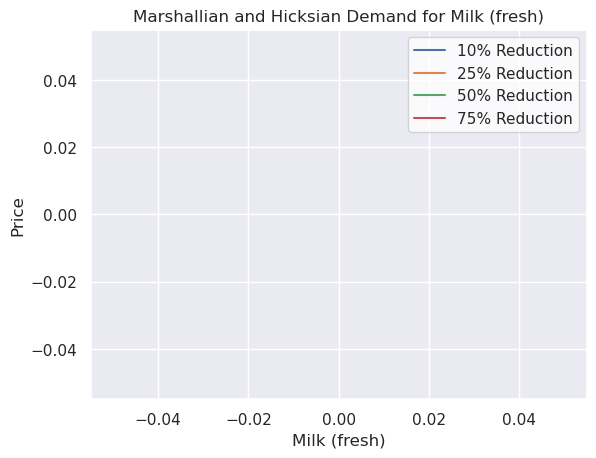

In [221]:
# my_j = 'Milk (fresh)' 

# P = np.geomspace(.01,10,50)*pbar[my_j]

# # Utility of median household, given prices
# U0 = result_tanzania.indirect_utility(xref,pbar)

# plt.plot([result_tanzania.demands(U0,my_prices(p0,j=my_j)[my_j] for p0 in P10],P10, 
#         label = '10% Reduction')
# plt.plot([result_tanzania.demands(U0,my_prices(p0,j=my_j)[my_j] for p0 in P25],P25, 
#         label = '25% Reduction')
# plt.plot([result_tanzania.demands(U0,my_prices(p0,j=my_j)[my_j] for p0 in P50],P50, 
#         label = '50% Reduction')
# plt.plot([result_tanzania.demands(U0,my_prices(p0,j=my_j)[my_j] for p0 in P75],P75, 
#         label = '75% Reduction')


# plt.ylabel('Price')
# plt.xlabel(my_j)
# plt.legend(facecolor='white')
# plt.title(f'Marshallian and Hicksian Demand for {my_j}'.format(str))
# #plt.xlim(0, 0.8)

Okay, now let's see what happens when we reduce the price of milk. We'll use fresh milk here as a substitute for canned and dried milk given calcium content (due to structure of data, dried milk is not able to estimate demand). We'll look at 4 amounts of price reduction. 

We developed a module that would return elasticities for a given country with the data. We also did this on a wide variety of countries!

In [62]:
import pickle

In [63]:
tanzania_path_hh_characteristics = "DataTanzania [Reformatted] - Household Characteristics (2019-20).csv"
tanzania_path_expenditure = "Data/Tanzania [Reformatted] - Food Expenditures (2019-20).csv"

Now, to use our results ...

In [67]:
result_tanzania = cfe.regression.read_pickle("Data/foo_tanzania.pickle")

Text(0.5, 1.0, 'Tanzania Elasticity by Food, sorted')

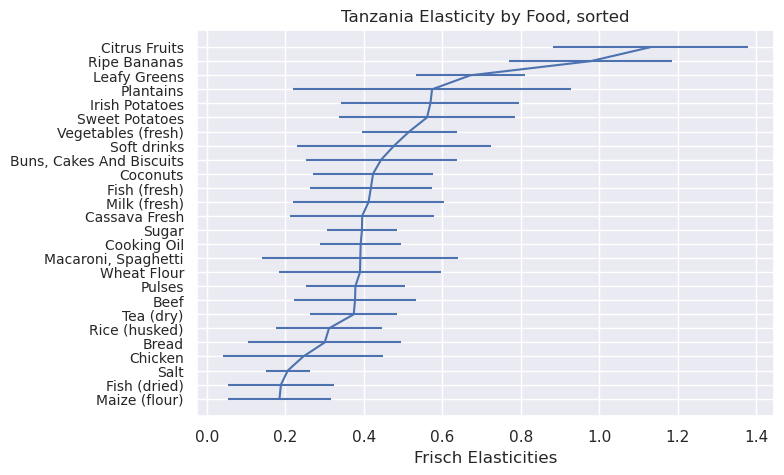

In [68]:
result_tanzania.graph_beta()
plt.title("Tanzania Elasticity by Food, sorted")

For Uganda, this is how consumption will vary with household need, based on the breakdown of people in the household.

In [ ]:
result_uganda.get_gamma()

For Tanzania, this is how consumption will vary by household need.

In [ ]:
result_tanzania.get_gamma()

k,M 00-03,F 00-03,M 04-08,F 04-08,M 09-13,F 09-13,M 14-18,F 14-18,M 19-30,F 19-30,M 31-50,F 31-50,M 51+,F 51+,log HSize,Constant
j,,,,,,,,,,,,,,,,
Beef,0.057889,-0.002642,0.130081,-0.030027,-0.190984,-0.085873,0.062322,0.064395,0.027185,0.018142,0.118226,0.150355,0.193557,0.103374,0.218583,8.765711
Bread,-0.216731,0.013294,-0.081903,0.188860,0.133395,0.157813,-0.208135,-0.031618,-0.016442,-0.018433,0.206704,-0.058163,0.245989,0.264208,0.102469,7.636376
"Buns, Cakes And Biscuits",-0.095275,-0.152395,-0.099655,-0.151606,0.101430,0.008435,0.044279,0.081443,-0.078121,-0.095017,-0.047911,-0.077995,-0.036018,-0.067753,0.627801,7.424461
Cassava Fresh,-0.033384,0.001466,-0.119424,-0.074521,0.099864,0.140275,-0.001128,-0.108641,0.010591,-0.014151,-0.054154,-0.042730,-0.000629,0.239447,0.468088,7.461882
Chicken,-0.047185,-0.153774,0.161374,0.104910,0.000649,-0.004481,-0.190906,-0.031950,-0.174711,-0.017650,-0.198964,0.002456,-0.104200,0.059834,0.540483,9.037218
Citrus Fruits,-0.214864,-0.029425,-0.401002,-0.064460,0.009824,-0.103253,-0.003060,-0.084038,-0.076891,-0.058235,-0.155576,-0.029758,-0.297496,0.147079,0.630790,6.871653
Coconuts,-0.071128,-0.021377,-0.007746,-0.069522,-0.024108,0.118142,-0.066862,-0.002895,0.001322,0.010893,-0.044446,-0.047646,0.225628,0.138669,0.367485,7.794761
Cooking Oil,-0.057656,0.007522,-0.149548,-0.099254,-0.055286,0.018071,0.067515,-0.004515,0.037113,0.152724,0.175469,0.192823,-0.031507,0.041400,0.248826,7.337196
Fish (dried),-0.144453,-0.041622,-0.077762,-0.034647,0.015654,0.017076,0.190645,0.000366,0.041801,0.079326,0.098826,-0.009236,0.071834,0.049411,0.247289,7.647585


## NUTRITION

First, we wanted to see how nutrition would change it we doubled expenditures for Uganda.

In [224]:
p_tanzania['Milk (fresh)']

t          m                   
2019-20    Dar Es Salaam           2000.000000
2019-20.1  Mainland Other Urban    1266.666667
2019-20.2  Mainland Rural          1000.000000
2019-20.3  Zanzibar                2000.000000
Name: Milk (fresh), dtype: float64

In [64]:
pbar

j
Beef                         8182.914573
Bread                        2964.556054
Buns, Cakes And Biscuits     2413.088084
Cassava Fresh                2434.111450
Chicken                     10005.481928
Citrus Fruits                1642.228125
Coconuts                     3097.412547
Cooking Oil                  5664.628450
Fish (dried)                 2682.048998
Fish (fresh)                12669.584375
Irish Potatoes               2132.843450
Leafy Greens                 1949.090083
Macaroni, Spaghetti          3026.891068
Maize (flour)                8581.781116
Milk (fresh)                 4033.140283
Plantains                   26234.105359
Pulses                       3246.365915
Rice (husked)               44223.031571
Ripe Bananas                 1988.300402
Salt                          265.140368
Soft drinks                  2586.734694
Sugar                        2015.548960
Sweet Potatoes               3722.577590
Tea (dry)                     406.006885
Vegetables (fr

In [56]:
result_tanzania.demands?

Signature: result_tanzania.demands(x, p=None, z=None, type='Marshallian')
Docstring:
Quantities demanded at prices p for household with observable
characteristics z, having a utility function with parameters given
by (possibly estimated) attributes from a Regression (i.e., the
vectors of parameters alpha, beta, delta).

Default type is "Marshallian", in which case argument x is budget.

Alternative types:
   - "Frischian" :: argument x is Marginal utility of expenditures
   - "Hicksian" :: argument x is level of utility

Ethan Ligon                                    April 2019
File:      /srv/conda/lib/python3.9/site-packages/cfe/regression.py
Type:      method

In [84]:
def my_prices(p0,p=pbar,j='food'):
    """
    Change price of jth good to p0, holding other prices fixed.
    """
    p = p.copy()
    p.loc[j] = p0
    return p

In [85]:
def price_drop_2_nutr_ratio(price_drop_percentage): 
    
    p = p_tanzania
    
    p['Milk (fresh)'] = p['Milk (fresh)'] - price_drop_percentage*p['Milk (fresh)']
    
    xhat = result_tanzania.predicted_expenditures()

    Budgets = xhat.quantile(np.linspace(.01,.99,20))
    
    qhat = []
    
    for x in Budgets:
        
        qhat += result_tanzania.demands(x,my_prices(p, pbar, j = 'Milk (fresh)'))

        qhat = qhat.loc[:,qhat.count()>0].dropna(how='all')

        use = fct_tanzania.index.intersection(qhat.columns)

        nutrients = qhat[use]@fct_tanzania.loc[use,:]
        nutrients.mean() 

        z = z_tanzania[rdi_tanzania.columns.tolist()]

        hh_rdi = z@rdi_tanzania.T

        hh_rwi = hh_rdi*7

        use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

        nutrient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()
    
    return nutrient_ratio

In [86]:
xhat

i             t        m               j                       
0001-001-001  2019-20  Mainland Rural  Beef                        6175.877996
                                       Bread                       2545.842987
                                       Buns, Cakes And Biscuits    1709.454297
                                       Cassava Fresh               2042.628361
                                       Chicken                     7852.948220
                                                                      ...     
0858-001-002  2019-20  Dar Es Salaam   Sugar                       5098.387678
                                       Sweet Potatoes              5706.392409
                                       Tea (dry)                    873.877319
                                       Vegetables (fresh)          9651.144735
                                       Wheat Flour                 4606.305872
Length: 27690, dtype: float64

In [87]:
pbar['Milk (fresh)']

391.66666668749997

In [88]:
price_drop_2_nutr_ratio(0.5)

AssertionError: 

In [83]:
result_tanzania.beta

j
Beef                        0.377320
Bread                       0.300077
Buns, Cakes And Biscuits    0.444066
Cassava Fresh               0.395648
Chicken                     0.245496
Citrus Fruits               1.130966
Coconuts                    0.423381
Cooking Oil                 0.391770
Fish (dried)                0.188521
Fish (fresh)                0.417848
Irish Potatoes              0.569504
Leafy Greens                0.671702
Macaroni, Spaghetti         0.390850
Maize (flour)               0.184789
Milk (fresh)                0.412032
Plantains                   0.573747
Pulses                      0.378353
Rice (husked)               0.310996
Ripe Bananas                0.977499
Salt                        0.205973
Soft drinks                 0.477239
Sugar                       0.394992
Sweet Potatoes              0.560885
Tea (dry)                   0.374065
Vegetables (fresh)          0.515630
Wheat Flour                 0.390105
Name: beta, dtype: float64

In [57]:
# Reading the food expenditures dataset for Tanzania
x_tanzania = pd.read_csv("Data/Tanzania [Reformatted] - Food Expenditures (2019-20).csv")

# If the 'm' column is not present, add it and set its values to 1
if 'm' not in x_tanzania.columns:
    x_tanzania['m'] = 1

# Setting a multi-level index
x_tanzania = x_tanzania.set_index(['i', 't', 'm'])
x_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
x_tanzania = x_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
x_tanzania = x_tanzania.replace(0, np.nan)

# Reading the household characteristics dataset for Tanzania
z_tanzania = pd.read_csv("Data/Tanzania [Reformatted] - Household Characteristics (2019-20).csv")

# If the 'm' column is not present, add it
if 'm' not in z_tanzania.columns:
    z_tanzania['m'] = 1

# Setting a multi-level index
z_tanzania = z_tanzania.set_index(['i', 't', 'm'])
z_tanzania.columns.name = 'k'

# Converting all columns to numeric, coercing errors to NaN
z_tanzania = z_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Assuming the 'new.csv' file is related to Tanzania's price data. The original naming wasn't clear.
p_tanzania = pd.read_csv("Data/new.csv")

# If the 'm' column is not present, add it
if 'm' not in p_tanzania.columns:
    p_tanzania['m'] = 1

# Setting a multi-level index
p_tanzania = p_tanzania.set_index(['t', 'm'])
p_tanzania.columns.name = 'j'

# Converting all columns to numeric, coercing errors to NaN
p_tanzania = p_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Replacing 0 values with NaN
p_tanzania = p_tanzania.replace(0, np.nan)

# Reading the Food Consumption Table (FCT) for Tanzania
fct_tanzania = pd.read_csv("Data/Tanzania [Reformatted] - FCT.csv")

rdi_tanzania = pd.read_csv("Data/Uganda - RDI.csv")

# Setting 'j' as the index
fct_tanzania = fct_tanzania.set_index('j')
fct_tanzania.columns.name = 'n'

# Converting all columns to numeric, coercing errors to NaN
fct_tanzania = fct_tanzania.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Setting 'n' as the index
rdi_tanzania = rdi_tanzania.set_index('n')
rdi_tanzania.columns.name = 'k'

# Running the CFE (Cost of Basic Needs) regression for Tanzania
result_tanzania = cfe.Regression(y=np.log(x_tanzania.stack()), d=z_tanzania)

# Displaying the sorted beta values for Tanzania
print("For Tanzania:")
result_tanzania.get_beta().sort_values(ascending=False)

For Tanzania:


j
Citrus Fruits               1.130966
Ripe Bananas                0.977499
Leafy Greens                0.671702
Plantains                   0.573747
Irish Potatoes              0.569504
Sweet Potatoes              0.560885
Vegetables (fresh)          0.515630
Soft drinks                 0.477239
Buns, Cakes And Biscuits    0.444066
Coconuts                    0.423381
Fish (fresh)                0.417848
Milk (fresh)                0.412032
Cassava Fresh               0.395648
Sugar                       0.394992
Cooking Oil                 0.391770
Macaroni, Spaghetti         0.390850
Wheat Flour                 0.390105
Pulses                      0.378353
Beef                        0.377320
Tea (dry)                   0.374065
Rice (husked)               0.310996
Bread                       0.300077
Chicken                     0.245496
Salt                        0.205973
Fish (dried)                0.188521
Maize (flour)               0.184789
Name: beta, dtype: float64

(array([7.53360160e-05, 4.70850100e-05, 1.03587022e-04, 9.41700199e-05,
        1.03587022e-04, 1.31838028e-04, 5.65020120e-05, 1.60089034e-04,
        8.47530180e-05, 1.22421026e-04, 6.59190140e-05, 9.41700199e-05,
        2.82510060e-05, 4.70850100e-05, 1.88340040e-05, 1.88340040e-05,
        9.41700199e-06, 3.76680080e-05, 9.41700199e-06, 0.00000000e+00,
        1.88340040e-05, 1.88340040e-05, 9.41700199e-06, 0.00000000e+00,
        9.41700199e-06, 1.88340040e-05, 1.88340040e-05, 9.41700199e-06,
        0.00000000e+00, 9.41700199e-06]),
 array([ 3519.19487693,  4222.44592861,  4925.69698029,  5628.94803196,
         6332.19908364,  7035.45013532,  7738.70118699,  8441.95223867,
         9145.20329035,  9848.45434202, 10551.7053937 , 11254.95644538,
        11958.20749705, 12661.45854873, 13364.70960041, 14067.96065208,
        14771.21170376, 15474.46275544, 16177.71380711, 16880.96485879,
        17584.21591047, 18287.46696214, 18990.71801382, 19693.9690655 ,
        20397.22011717

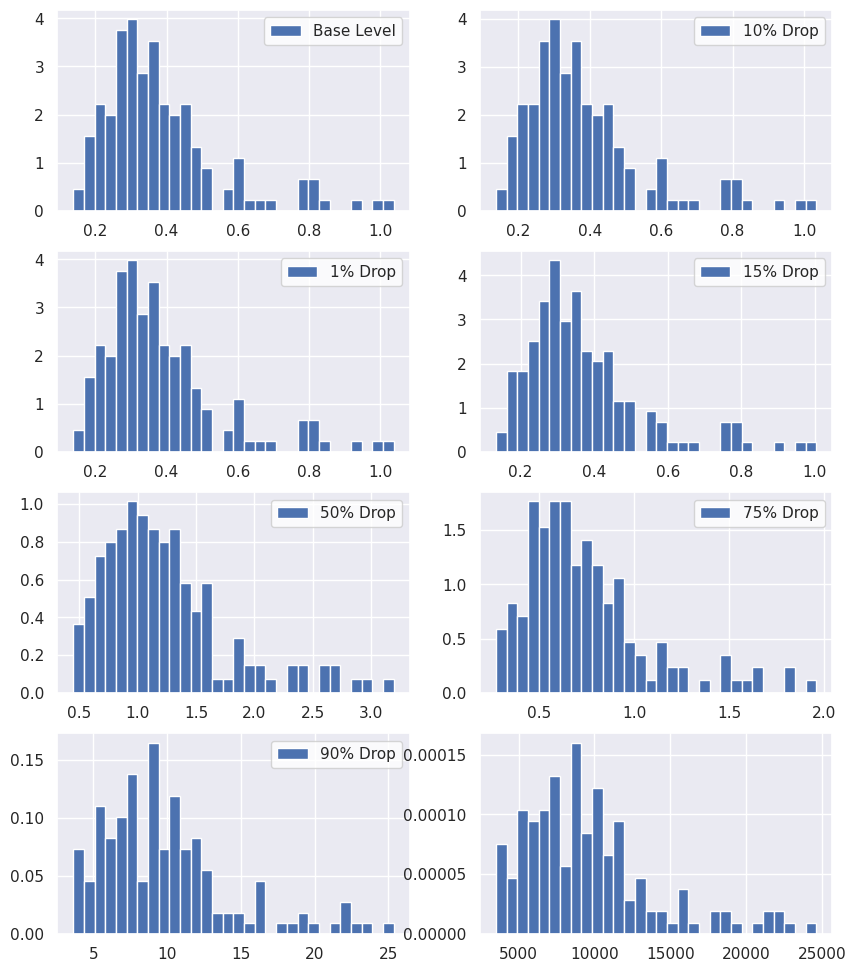

In [260]:
fig, ax = plt.subplots(4, 2, figsize = (10, 12),sharex=True)

drop15 = price_drop_2_nutr_ratio(0.15)
drop10 = price_drop_2_nutr_ratio(0.1)
drop1 = price_drop_2_nutr_ratio(0.01)
drop0 = price_drop_2_nutr_ratio(0)
drop75 = price_drop_2_nutr_ratio(0.75)
drop50 = price_drop_2_nutr_ratio(0.5)
drop90 = price_drop_2_nutr_ratio(0.9)
drop99p9 = price_drop_2_nutr_ratio(0.999)


ax[0,0].hist(drop0['Calcium'], bins=30, label='Base Level', density=True)
ax[0,0].legend(facecolor = 'white')
ax[0,1].hist(drop10['Calcium'], bins=30, label='10% Drop', density=True)
ax[0,1].legend(facecolor = 'white')
ax[1,0].hist(drop1['Calcium'], bins=30, label='1% Drop', density=True)
ax[1,0].legend(facecolor = 'white')
ax[1,1].hist(drop15['Calcium'], bins=30, label='15% Drop', density=True)
ax[1,1].legend(facecolor = 'white')
ax[2,0].hist(drop50['Calcium'], bins=30, label='50% Drop', density=True)
ax[2,0].legend(facecolor = 'white')
ax[2,1].hist(drop75['Calcium'], bins=30, label='75% Drop', density=True)
ax[2,1].legend(facecolor = 'white')
ax[3,0].hist(drop90['Calcium'], bins=30, label='90% Drop', density=True)
ax[3,0].legend(facecolor = 'white')
ax[3,1].hist(drop99p9['Calcium'], bins=30, label='99.9% Drop', density=True)



Then, to do the same for Tanzania...

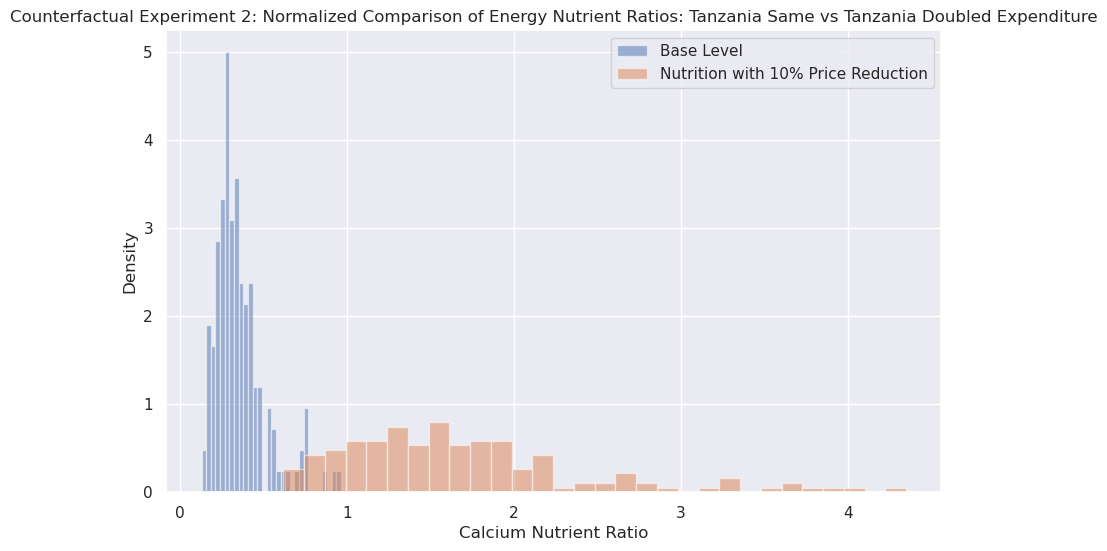

In [232]:
xhat = result_tanzania.predicted_expenditures()

qhat = (xhat.unstack('j')/p1).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_tanzania.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_tanzania.loc[use,:]
nutrients.mean() 

z = z_tanzania[rdi_tanzania.columns.tolist()]

hh_rdi = z@rdi_tanzania.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

tenpercent_nutritient_ratio = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

plt.figure(figsize=(10, 6))

# Plotting the normalized histogram for Uganda's energy nutrient ratio
plt.hist(nutrient_ratio_tanzania['Calcium'], bins=30, alpha=0.5, label='Base Level', density=True)

# Plotting the normalized histogram for Tanzania's energy nutrient ratio

plt.hist(onepercent_nutritient_ratio['Calcium'], bins=30, alpha=0.5, label='Nutrition with 10% Price Reduction', density=True)
plt.hist(onepercent_nutritient_ratio['Calcium'], bins=30, alpha=0.5, label='Nutrition with 10% Price Reduction', density=True)

plt.title('Counterfactual Experiment 2: Normalized Comparison of Energy Nutrient Ratios: Tanzania Same vs Tanzania Doubled Expenditure')
plt.xlabel('Calcium Nutrient Ratio')
plt.ylabel('Density')  # Adjusting label to 'Density' for clarity
plt.legend(loc='upper right')

plt.show()

### Counterfactual Experiment 3: Trade
In this section, we assess how increasing trade into Tanzania for the good, "Cassava Fresh", would benefit the population's Vitamin C levels.

First, if we trade 40000 Ugandan Shillings (per household) worth of Tanzanian beef into Uganda, how will this benefit Ugandan Protein consumption?

/var/folders/97/l1_w165s1z38tw82rlydjzp00000gn/T/ipykernel_1708/3449921227.py:24: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  nutrient_ratio_uganda_2 = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()


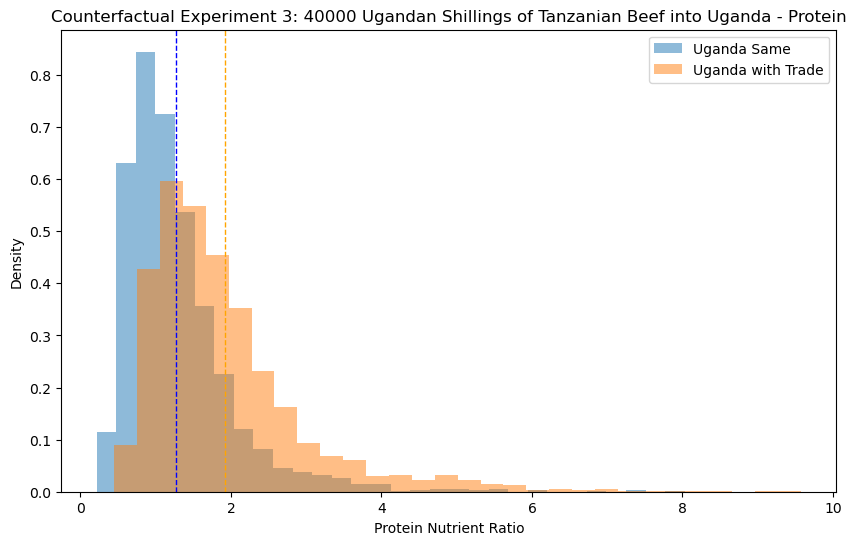

In [ ]:
result_uganda = cfe.Regression(y=np.log(x_uganda.stack()), d=z_uganda)

xhat = result_uganda.predicted_expenditures()

xhat.loc[xhat.index.get_level_values('j') == 'Beef'] += 40000

qhat = (xhat.unstack('j')/p_uganda).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_uganda.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_uganda.loc[use,:]
nutrients.mean() 

z = z_uganda[rdi_uganda.columns.tolist()]

hh_rdi = z@rdi_uganda.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_uganda_2 = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

plt.figure(figsize=(10, 6))

plt.hist(nutrient_ratio_uganda['Protein'], bins=30, alpha=0.5, label='Uganda Same', density=True)
plt.axvline(nutrient_ratio_uganda['Protein'].mean(), color='blue', linestyle='dashed', linewidth=1)

plt.hist(nutrient_ratio_uganda_2['Protein'], bins=30, alpha=0.5, label='Uganda with Trade', density=True)
plt.axvline(nutrient_ratio_uganda_2['Protein'].mean(), color='orange', linestyle='dashed', linewidth=1)

plt.title('Counterfactual Experiment 3: 40000 Ugandan Shillings of Tanzanian Beef into Uganda - Protein')
plt.xlabel('Protein Nutrient Ratio')
plt.ylabel('Density') 
plt.legend(loc='upper right')

plt.show()

Tanzania, a wealthier country than Uganda, can gain a lot from this trade as well. First, Tanzania's Vitamin C levels are low - can trading Cassava from Uganda into Tanzania help? Here we trade 5000 Tanzanian shillings worth of Cassava from Uganda into Tanzania.

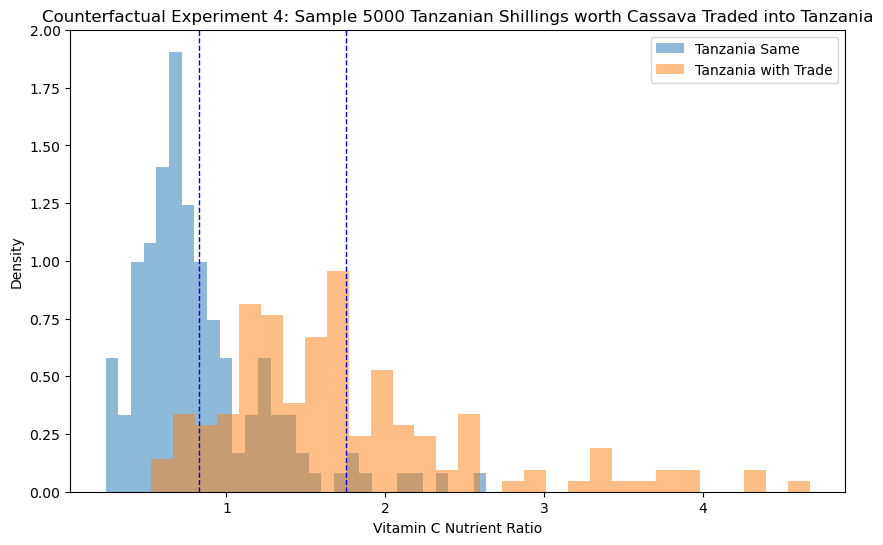

In [ ]:
result_tanzania = cfe.Regression(y=np.log(x_tanzania.stack()), d=z_tanzania)

xhat = result_tanzania.predicted_expenditures()

item_to_increase = 'Cassava Fresh'

xhat.loc[xhat.index.get_level_values('j') == item_to_increase] += 5000

qhat = (xhat.unstack('j')/p_tanzania).dropna(how='all')

qhat = qhat.loc[:,qhat.count()>0]

use = fct_tanzania.index.intersection(qhat.columns)

nutrients = qhat[use]@fct_tanzania.loc[use,:]
nutrients.mean() 

z = z_tanzania[rdi_tanzania.columns.tolist()]

hh_rdi = z@rdi_tanzania.T

hh_rwi = hh_rdi*7

use_nutrients = nutrients.columns.intersection(hh_rwi.columns)

nutrient_ratio_tanzania_2 = (nutrients[use_nutrients]/hh_rwi[use_nutrients]).dropna()

plt.figure(figsize=(10, 6))

plt.hist(nutrient_ratio_tanzania['Vitamin C'], bins=30, alpha=0.5, label='Tanzania Same', density=True)
plt.axvline(nutrient_ratio_tanzania['Vitamin C'].mean(), color='blue', linestyle='dashed', linewidth=1)


plt.hist(nutrient_ratio_tanzania_2['Vitamin C'], bins=30, alpha=0.5, label='Tanzania with Trade', density=True)
plt.axvline(nutrient_ratio_tanzania_2['Vitamin C'].mean(), color='blue', linestyle='dashed', linewidth=1)

plt.title('Counterfactual Experiment 4: Sample 5000 Tanzanian Shillings worth Cassava Traded into Tanzania')
plt.xlabel('Vitamin C Nutrient Ratio')
plt.ylabel('Density') 
plt.legend(loc='upper right')

plt.show()

Overall, our counterfactual experiments point to one policy idea that can solve two big problems:

- Problem 1: Tanzanians do not get enough Vitamin C.
- Problem 2: Ugandans do not get enough Protein.

Our solution:

- Tanzanians trade beef into Uganda, Ugandas trade Cassava into Tanzania.

The solution's simulated predictions:

- Both Uganda and Tanzania achieving average nutrient ratios greater than 1 for both protein and Vitamin C.

**Conclusion: Trade can help neighboring countries solve national nutritional deficiencies.**